# Competing Event View on the Enron Dataset

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [8]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import shared_utils
from datasets import load_dataset
from stats import collect_edge_statistics, collect_node_statistics
from shared_utils import train_val_test_split_dataframe

shared_utils.set_theme(fontsize=20)

We start by loading a score DataFrame, containing for each event in the dataset, the score of the True event and the Scores of Negatively sampled events

In [14]:
# SCORE_PATH = "models/wikipedia/3/checkpoint_10_scores.csv"
SCORE_PATH = "models/enron/1/checkpoint_30_scores.csv"
RUN_PATH = os.path.join(os.path.dirname(SCORE_PATH))
DATASET = os.path.basename(os.path.dirname(RUN_PATH))
PLOT_PATH = os.path.join(RUN_PATH, "plots")

In [15]:
events, _, _ = load_dataset(DATASET, data_dir=shared_utils.DATA_PATH).values()
scores = pd.read_csv(SCORE_PATH)
events = pd.concat([events, scores], axis=1)
collect_edge_statistics(events)
collect_node_statistics(events)
train_val_test_split_dataframe(events, val_ratio=0.15, test_ratio=0.15)

enron dataset found, loading it


# Visualizing the Highest Scorer of each event on a Temporal Edge Activity Plot

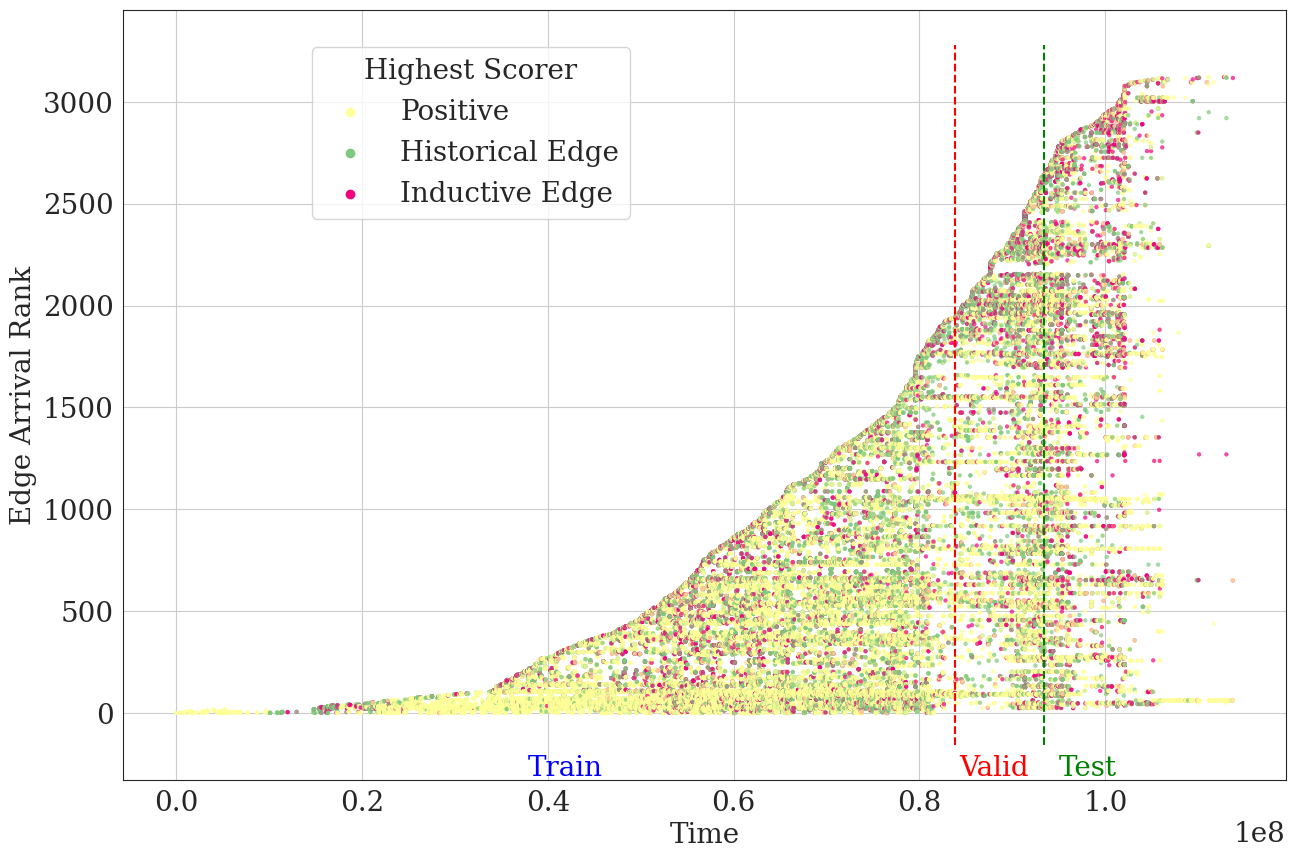

In [20]:
events.reset_index(drop=False).set_index("split", inplace=True)


fig, ax = plt.subplots(figsize=(15, 10))
# sns.set_theme(style="whitegrid")

split_cols = ["val", "test"]
comparison_cols = [
    "pos",
    "historical_edge",
    # "destination",
    "inductive_edge",
    # "inductive_dst",
    # "historical_dst",
]
events["best_edge_ns"] = events[comparison_cols].idxmax(axis=1)
rename_dict = {
    "pos": "Positive",
    "historical_edge": "Historical Edge",
    "inductive_edge": "Inductive Edge",
}
events["best_edge_ns"] = events["best_edge_ns"].replace(rename_dict)


color_palette = {
    "Inductive Edge": "#f0027f",
    "Historical Edge": "#7fc97f",
    "Positive": "#ffff99",
}
sns.scatterplot(
    # data=events.loc[split_cols],
    data=events,
    y="edge_arrival_rank",
    x="t",
    hue="best_edge_ns",
    palette=color_palette,
    alpha=0.7,
    linewidth=0,
    s=10,
    ax=ax,
    # legend=False,
)
ax.set_ylabel("Edge Arrival Rank")
ax.set_xlabel("Time")

# get the x ticks and labels
xticks = ax.get_xticks()
xticklabels = [str(int(x)) for x in xticks]
ylim = ax.get_ylim()
ax.vlines(
    events.val_time,
    ymin=ylim[0],
    ymax=ylim[1],
    colors="r",
    linestyles="dashed",
    # label="val split",
)
ax.vlines(
    events.test_time,
    ymin=ylim[0],
    ymax=ylim[1],
    colors="g",
    linestyles="dashed",
    # label="test split",
)

y_annot = ylim[1] - 0.05 * (ylim[1] - ylim[0])
# y_annot = -0 * (ylim[1] - ylim[0])
y_annot = -0.09 * (ylim[1] - ylim[0])
x_annot_train = events.val_time * (0.5)
x_annot_val = events.val_time * (1 + 0.05)
x_annot_test = events.test_time * (1 + 0.05)

ax.annotate(
    "Train",
    (x_annot_train, y_annot),
    color="b",
    ha="center",
    # fontsize=20,
    rotation=0,
)
ax.annotate(
    "Valid",
    (x_annot_val, y_annot),
    color="r",
    ha="center",
    # fontsize=20,
    rotation=0,
)
ax.annotate(
    "Test",
    (x_annot_test, y_annot),
    color="g",
    ha="center",
    # fontsize=20,
    rotation=0,
)

plt.legend(
    title="Highest Scorer",
    loc="upper left",
    bbox_to_anchor=(0.15, 0.97),
)

If we split the time into intervals, we can count for each interval and each competitor, the number of time the competitor 'wins' in each interval

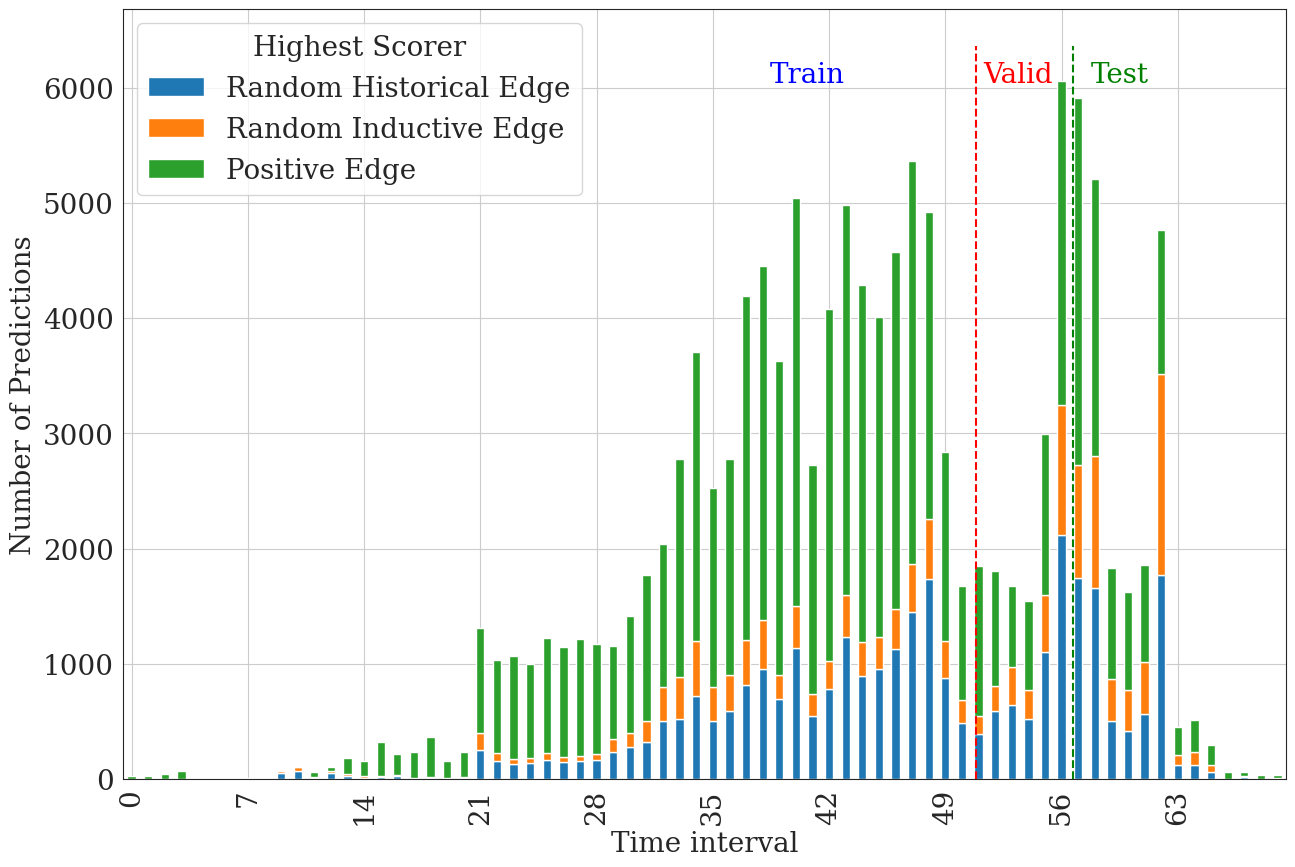

,src,dst,t,label,idx,pos,destination,historical_edge,inductive_edge,inductive_dst,...,dst_degree,t_scaled,best_edge_ns,he_err,ie_err,success,interval,best_node_ns,hd_err,id_err
split,,,,,,,,,,,,,,,,,,,,,
train,115,170,0.0,0,1,0.493635,0.493635,0.493635,0.493635,0.493635,...,1.0,0.000000,Positive,False,False,True,1.624863e+06,Positive,False,False
train,115,170,0.0,0,2,0.493635,0.493635,0.493635,0.493635,0.493635,...,2.0,0.000000,Positive,False,False,True,1.624863e+06,Positive,False,False
train,115,124,529920.0,0,3,0.493635,0.493635,0.493635,0.493635,0.493635,...,1.0,0.004659,Positive,False,False,True,1.624863e+06,Positive,False,False
train,115,124,529920.0,0,4,0.493635,0.493635,0.493635,0.493635,0.493635,...,2.0,0.004659,Positive,False,False,True,1.624863e+06,Positive,False,False
train,115,124,533820.0,0,5,0.493635,0.493635,0.493635,0.493635,0.493635,...,3.0,0.004693,Positive,False,False,True,1.624863e+06,Positive,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test,18,18,113717323.0,0,125231,2.251269,1.109701,1.166616,2.062098,0.445649,...,3778.0,0.999797,Positive,False,False,True,1.137404e+08,Positive,False,False
test,163,18,113733034.0,0,125232,0.871308,1.401725,1.858353,1.964926,1.371405,...,3779.0,0.999935,Inductive Edge,False,True,False,1.137404e+08,Historical Destination,True,False
test,163,156,113733034.0,0,125233,2.086906,1.723467,1.946372,2.218306,1.371405,...,6630.0,0.999935,Inductive Edge,False,True,False,1.137404e+08,Positive,False,False


In [30]:
fig  # Calculate error rates over time
n_bins = 70
events["he_err"] = events["best_edge_ns"] == "Historical Edge"
events["ie_err"] = events["best_edge_ns"] == "Inductive Edge"
events["success"] = events["best_edge_ns"] == "Positive"
events["interval"] = pd.cut(
    events.t,
    bins=n_bins,
    # labels=True,
)
events["interval"] = events["interval"].apply(lambda x: x.right)
df_by_interval = events.groupby(["interval"]).agg(
    {
        "he_err": "sum",
        "ie_err": "sum",
        "success": "sum",
    }
)


df_by_interval.plot.bar(stacked=True, figsize=(15, 10))
n_ticks = 10
step_size = int(n_bins / n_ticks)

plt.xlabel("Time interval")
plt.ylabel("Number of Predictions")
plt.legend(
    labels=["Random Historical Edge", "Random Inductive Edge", "Positive Edge"],
    title="Highest Scorer",
)

ylim = plt.ylim()
tmin = events.t.min()
tmax = events.t.max()
x_val = ((n_bins - 1) * (events.val_time - tmin) / (tmax - tmin),)
x_test = ((n_bins - 1) * (events.test_time - tmin) / (tmax - tmin),)


plt.vlines(
    x_val,
    ymin=ylim[0],
    ymax=ylim[1],
    colors="r",
    linestyles="dashed",
    label="val split",
)
plt.vlines(
    x_test,
    ymin=ylim[0],
    ymax=ylim[1],
    colors="g",
    linestyles="dashed",
    label="test split",
)

plt.annotate(
    "Train",
    (x_val[0] * (0.8), ylim[1] - 0.05 * (ylim[1] - ylim[0])),
    color="b",
    ha="center",
    rotation=0,
)

plt.annotate(
    "Valid",
    (x_val[0] * (1.05), ylim[1] - 0.05 * (ylim[1] - ylim[0])),
    color="r",
    ha="center",
    rotation=0,
)

plt.annotate(
    "Test",
    (x_test[0] * (1.05), ylim[1] - 0.05 * (ylim[1] - ylim[0])),
    color="g",
    ha="center",
    rotation=0,
)


xticks = plt.xticks()[0]
xticklabels = [int(x) for x in xticks]
plt.xticks(xticks[::step_size], xticklabels[::step_size])

plt.show()
events

# Plot the Highest Scorer on a Temporal Node Activity Plot

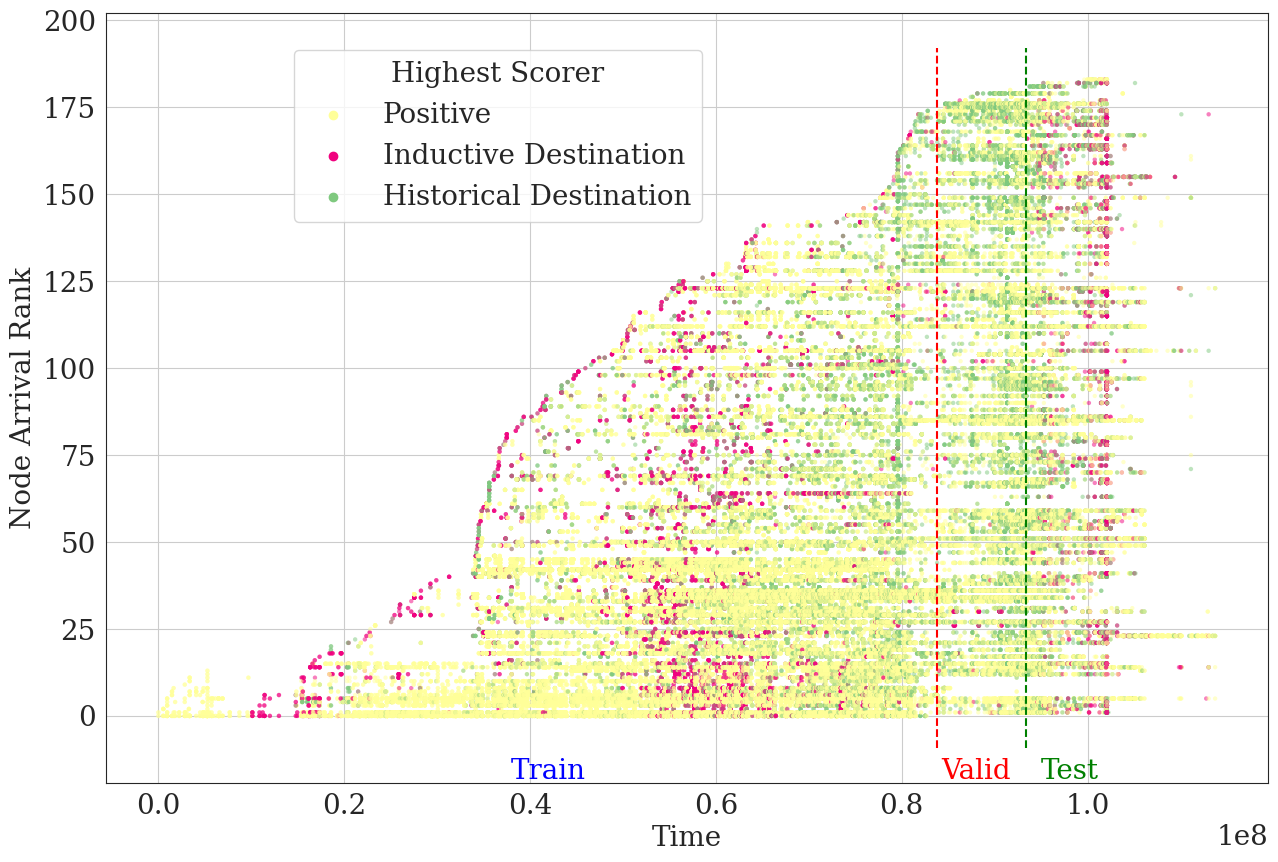

In [23]:
events.reset_index(drop=False).set_index("split", inplace=True)


fig, ax = plt.subplots(figsize=(15, 10))

split_cols = ["val", "test"]
comparison_cols = [
    "pos",
    # "historical_edge",
    # "destination",
    # "inductive_edge",
    "inductive_dst",
    "historical_dst",
]
events["best_node_ns"] = events[comparison_cols].idxmax(axis=1)
rename_dict = {
    "pos": "Positive",
    "inductive_dst": "Inductive Destination",
    "historical_dst": "Historical Destination",
}

color_palette = {
    "Inductive Destination": "#f0027f",
    "Historical Destination": "#7fc97f",
    "Positive": "#ffff99",
}
events["best_node_ns"] = events["best_node_ns"].replace(rename_dict)
sns.scatterplot(
    # data=events.loc[split_cols],
    data=events,
    y="src_arrival_rank",
    x="t",
    hue="best_node_ns",
    alpha=0.5,
    linewidth=0,
    palette=color_palette,
    s=10,
    legend=False,
    ax=ax,
)
sns.scatterplot(
    # data=events.loc[split_cols],
    data=events,
    y="dst_arrival_rank",
    x="t",
    hue="best_node_ns",
    alpha=0.5,
    linewidth=0,
    palette=color_palette,
    s=10,
    ax=ax,
    # legend=False,
)
ax.set_ylabel("Node Arrival Rank")
ax.set_xlabel("Time")

# get the x ticks and labels
xticks = ax.get_xticks()
xticklabels = [str(int(x)) for x in xticks]

ylim = ax.get_ylim()

y_annot = ylim[1] - 0.05 * (ylim[1] - ylim[0])
# y_annot = -0 * (ylim[1] - ylim[0])
y_annot = -0.09 * (ylim[1] - ylim[0])
x_annot_train = events.val_time * (0.5)
x_annot_val = events.val_time * (1 + 0.05)
x_annot_test = events.test_time * (1 + 0.05)

ax.vlines(
    events.val_time,
    ymin=ylim[0],
    ymax=ylim[1],
    colors="r",
    linestyles="dashed",
    # label="Validation",
)
ax.vlines(
    events.test_time,
    ymin=ylim[0],
    ymax=ylim[1],
    colors="g",
    linestyles="dashed",
    # label="Test",
)

ax.annotate(
    "Train",
    (x_annot_train, y_annot),
    color="b",
    ha="center",
    rotation=0,
)
ax.annotate(
    "Valid",
    (x_annot_val, y_annot),
    color="r",
    ha="center",
    rotation=0,
)
ax.annotate(
    "Test",
    (x_annot_test, y_annot),
    color="g",
    ha="center",
    rotation=0,
)
ax.legend(
    title="Highest Scorer",
    loc="upper left",
    bbox_to_anchor=(0.15, 0.97),
)

## Same, but aggregated by time

<Figure size 1500x1000 with 0 Axes>

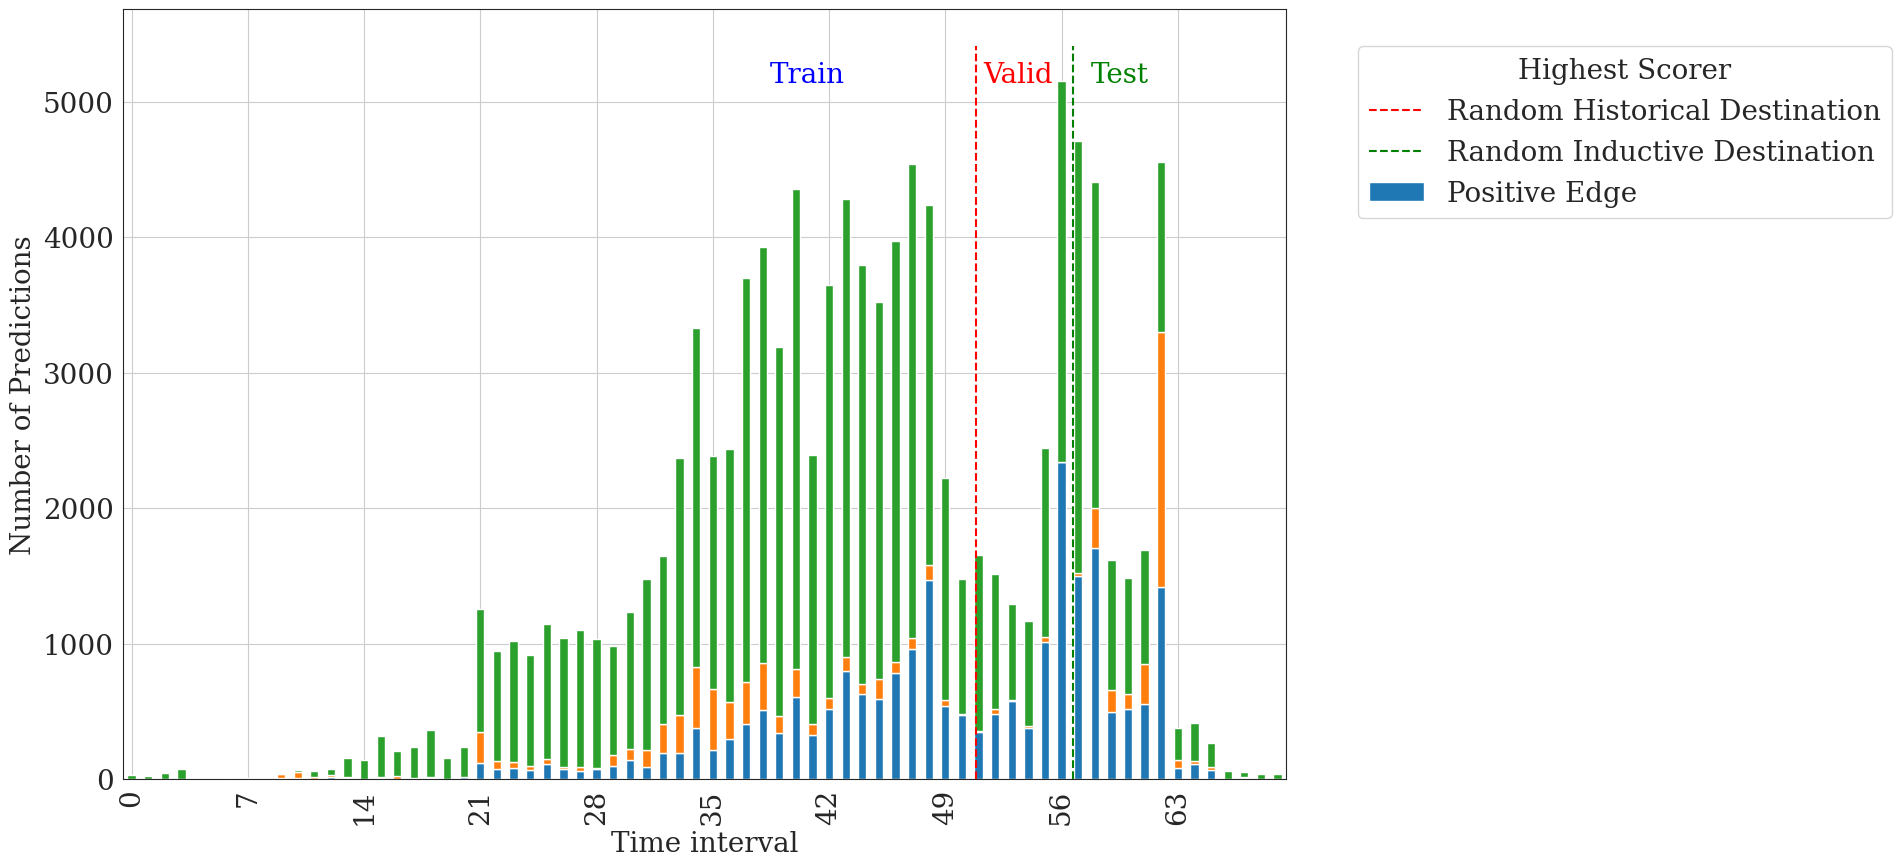

In [29]:
# Calculate error rates over time

plt.figure(figsize=(15, 10))
events["hd_err"] = events["best_node_ns"] == "Historical Destination"
events["id_err"] = events["best_node_ns"] == "Inductive Destination"

events["interval"] = pd.cut(
    events.t,
    bins=n_bins,
    # labels=True,
)
events["interval"] = events["interval"].apply(lambda x: x.right)
df_by_interval = events.groupby(["interval"]).agg(
    {
        "hd_err": "sum",
        "id_err": "sum",
        "success": "sum",
    }
)


# Stacked barplot using seaborn
df_by_interval.plot.bar(
    stacked=True,
    figsize=(15, 10),
)

n_ticks = 10
step_size = int(n_bins / n_ticks)

# Uncomment the following lines if you want to add custom labels to x-axis ticks
# xticklabels = [str(int(x) // 1e8) for x in xticks]
# plt.xticks(xticks, xticklabels)

# Uncomment the following line if you want to set custom labels with the existing xticks
# plt.xticks(xticks, xticklabels[::step_size])

plt.xlabel("Time interval")
plt.ylabel("Number of Predictions")


# Take only one every 10 ticks

xticks = plt.xticks()[0]
xticklabels = [int(x) for x in xticks]
plt.xticks(xticks[::step_size], xticklabels[::step_size])

ylim = plt.ylim()
plt.vlines(
    x_val,
    ymin=ylim[0],
    ymax=ylim[1],
    colors="r",
    linestyles="dashed",
    label=None,
)
plt.vlines(
    x_test,
    ymin=ylim[0],
    ymax=ylim[1],
    colors="g",
    linestyles="dashed",
    label=None,
    # label="test split",
)

plt.annotate(
    "Train",
    (x_val[0] * (0.8), ylim[1] - 0.05 * (ylim[1] - ylim[0])),
    color="b",
    ha="center",
    rotation=0,
)

plt.annotate(
    "Valid",
    (x_val[0] * (1 + 0.05), ylim[1] - 0.05 * (ylim[1] - ylim[0])),
    color="r",
    ha="center",
    rotation=0,
)

plt.annotate(
    "Test",
    (x_test[0] * (1 + 0.05), ylim[1] - 0.05 * (ylim[1] - ylim[0])),
    color="g",
    ha="center",
    rotation=0,
)
plt.legend(
    labels=[
        "Random Historical Destination",
        "Random Inductive Destination",
        "Positive Edge",
    ],
    title="Highest Scorer",
    # Legend on the right of the plot, outside the plot area
    loc="upper left",
    bbox_to_anchor=(1.05, 0.97),
)
plt.show()